# Homework - Python 3
Name: Michael Tonggi Situmorang
<br> Date: 3 November 2019
<br> e-mail: michael_t_situmorang@telkomsel.co.id
***

## 1. Import Modules
On this section, all modules that are needed would be imported

In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

## 2. Import Data Set
On this section, the dataset that is needed would be imported

In [10]:
titanic = pd.read_csv('data_set/train.csv')

## 3. Read Data Set

### 3.1 Read top 10 data

In [8]:
titanic.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

### 3.2 Read data info

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### 3.3 Check for missing values

In [11]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 3.3.1 Age - Missing Values

In [37]:
print("There are",sum(pd.isnull(titanic['Age'])),"missing values from the 'Age' column on the dataset")
print("That 177 missing values are about",round(177/(len(titanic["PassengerId"]))*100,4),"% of the total values in 'Age' Column")

There are 177 missing values from the 'Age' column on the dataset
That 177 missing values are about 19.8653 % of the total values in 'Age' Column


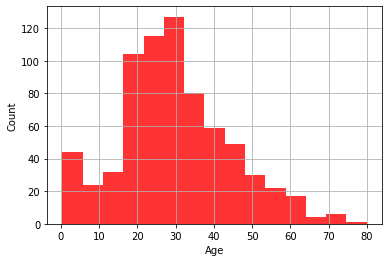

In [29]:
ax = titanic["Age"].hist(bins=15, color='red', alpha=0.8)
ax.set(xlabel='Age', ylabel='Count')
plt.show()

Because "Age" is (right) skewed, using the mean might give us biased results through filling in ages that are older than desired. Thus, we'll use the median to replace the missing values.


In [41]:
print("The median of the 'Age' column is: ", titanic["Age"].median(skipna=True))

The median of the 'Age' column is:  28.0


#### 3.3.2 Cabin - Missing Values

In [39]:
print("There are",sum(pd.isnull(titanic['Cabin'])),"missing values from the 'Cabin' column on the dataset")
print("That 687 missing values are about",round(687/(len(titanic["PassengerId"]))*100,4),"% of the total values in 'Cabin' Column")

There are 687 missing values from the 'Cabin' column on the dataset
That 687 missing values are about 77.1044 % of the total values in 'Cabin' Column


Due to large number of missing values on the "Cabin" column, it is unwise to replace and use the missing values. As such, we are going to drop this data

#### 3.3.3 Embarked - Missing Values

In [43]:
print("There are",sum(pd.isnull(titanic['Embarked'])),"missing values from the 'Embarked' column on the dataset")
print("That 2 missing values are about",round(2/(len(titanic["PassengerId"]))*100,4),"% of the total values in 'Embarked' Column")

There are 2 missing values from the 'Embarked' column on the dataset
That 2 missing values are about 0.2245 % of the total values in 'Embarked' Column


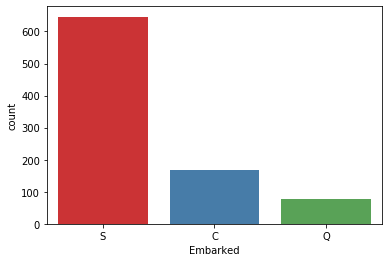

In [83]:
sb.countplot(x='Embarked',data=titanic,palette='Set1')
plt.show()

Because a lot of passangers embarked from Southampton, we will replace the 2 missing values with 'S'

## 4. Data Engineering

### 4.1 Replace Missing Values

In [45]:
titanic["Age"].fillna(28, inplace=True)
titanic["Embarked"].fillna("S", inplace=True)
titanic.drop('Cabin', axis=1, inplace=True)

In [46]:
titanic.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male  28.0      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S  
5      0            330877   8.4583        Q  
6      0             17463  51.8625        S  
7      1            349909  21.0750        S  
8      2            347742  11.1333        S  
9      0            237736  30.0708        C

In [47]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


### 4.2 Additional Variables

#### 4.2.1 SibSP and Parch Combination
For simplicity, we are going to combine SibSP and Parch into one category: whether or not the passanger is traveling alone

In [49]:
titanic['TravelBuddy']=titanic["SibSp"]+titanic["Parch"]
titanic['TravelAlone']=np.where(titanic['TravelBuddy']>0, 0, 1)

In [54]:
titanic.drop('TravelBuddy', axis=1, inplace=True)

In [90]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  \
0                            Braund, Mr. Owen Harris    male  22.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2                             Heikkinen, Miss. Laina  female  26.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4                           Allen, Mr. William Henry    male  35.0   

             Ticket     Fare Embarked  TravelAlone  
0         A/5 21171   7.2500        S            0  
1          PC 17599  71.2833        C            0  
2  STON/O2. 3101282   7.9250        S            1  
3            113803  53.1000        S            0  
4            373450   8.0500        S            1

## 5. Exploratory Data Analysis

### 5.1 Exploration of Survivor

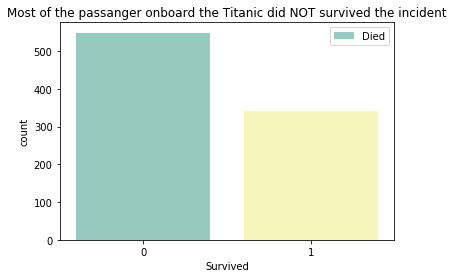

In [153]:
sb.countplot('Survived',data=titanic, palette='Set3')
plt.title('Most of the passanger onboard the Titanic did NOT survived the incident')
plt.legend(['Died', 'Survived'])
plt.show()

### 5.2 Exploration of Age

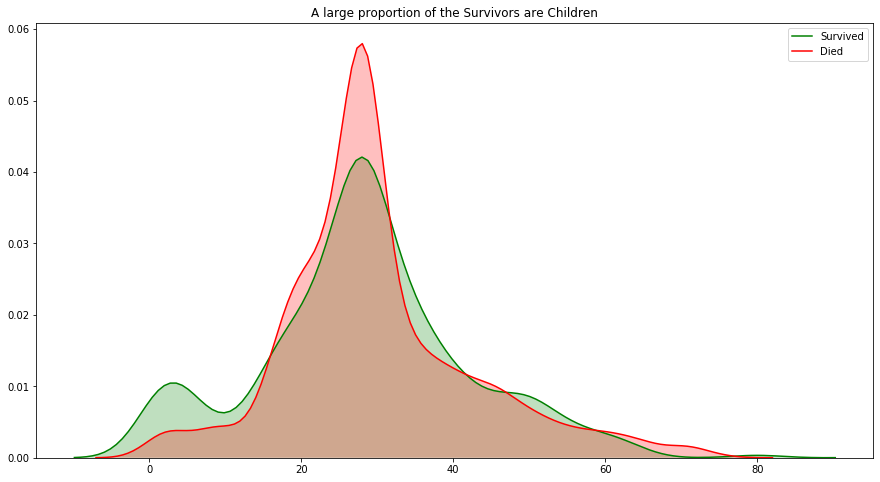

In [92]:
plt.figure(figsize=(15,8))
sb.kdeplot(titanic["Age"][titanic.Survived == 1], color="green", shade=True)
sb.kdeplot(titanic["Age"][titanic.Survived == 0], color="red", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('A large proportion of the Survivors are Children')
plt.show()

### 5.3 Exploration of Fare

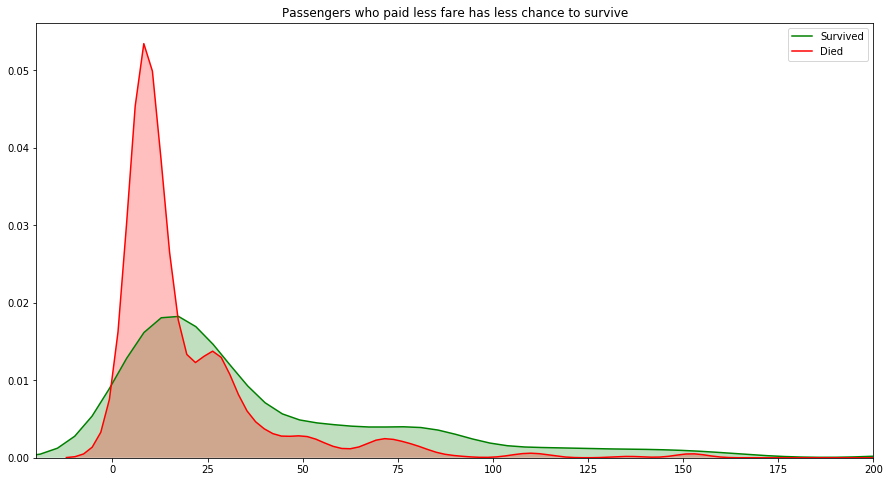

In [93]:
plt.figure(figsize=(15,8))
sb.kdeplot(titanic["Fare"][titanic.Survived == 1], color="green", shade=True)
sb.kdeplot(titanic["Fare"][titanic.Survived == 0], color="red", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Passengers who paid less fare has less chance to survive')

# limit x axis to zoom on most information. there are a few outliers in fare. 
plt.xlim(-20,200)
plt.show()

### 5.4 Exploration of Class

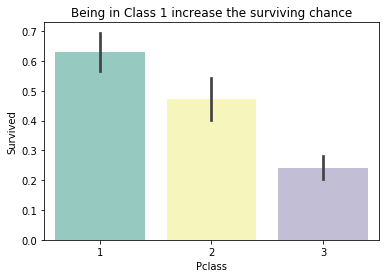

In [110]:
sb.barplot('Pclass', 'Survived', data=titanic, palette='Set3')
plt.title('Being in Class 1 increase the surviving chance')
plt.show()

### 5.5 Exploration of Embarked Port

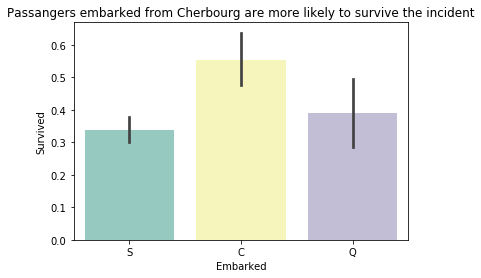

In [116]:
sb.barplot('Embarked', 'Survived', data=titanic, palette="Set3")
plt.title('Passangers embarked from Cherbourg are more likely to survive the incident')
plt.show()

### 5.6 Exploration of Traveling Alone vs With Family

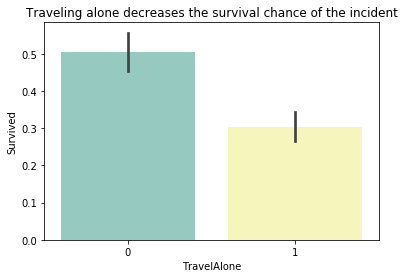

In [156]:
sb.barplot('TravelAlone', 'Survived', data=titanic, palette="Set3")
plt.title('Traveling alone decreases the survival chance of the incident')
plt.show()

### 5.7 Exploration of Gender

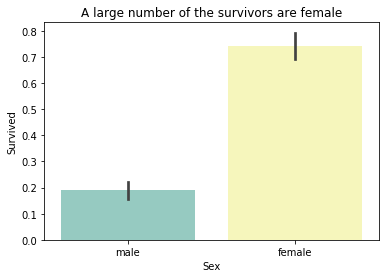

In [122]:
sns.barplot('Sex', 'Survived', data=titanic, palette="Set3")
plt.title('A large number of the survivors are female')
plt.show()

### 5.8 Exploration of Gender and PClass

In [146]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65

ax1=fig.add_subplot(141)
female_highclass = titanic.Survived[titanic.Sex == 'female'][titanic.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Female in Highclass has higher survival rate than among others")
plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = titanic.Survived[titanic.Sex == 'female'][titanic.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Survived", "Died"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = titanic.Survived[titanic.Sex == 'male'][titanic.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = titanic.Survived[titanic.Sex == 'male'][titanic.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

### 5.9 Exploration of Gender and Embarked Port

In [147]:
fig = plt.figure(figsize=(18,6), dpi=1600)
alpha_level = 0.65

ax1=fig.add_subplot(161)
female_c = titanic.Survived[titanic.Sex == 'female'][titanic.Embarked == 'C'].value_counts()
female_c.plot(kind='bar', label='female, cherbourg', color='red', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_c))
plt.title("Male from Southampton are more likely not to survive the Titanic voyage")
plt.legend(loc='best')

ax2=fig.add_subplot(162, sharey=ax1)
female_s = titanic.Survived[titanic.Sex == 'female'][titanic.Embarked == 'S'].value_counts()
female_s.plot(kind='bar', label='female, southampton', color='blue', alpha=alpha_level)
ax2.set_xticklabels(["Survived", "Died"], rotation=0)
ax2.set_xlim(-1, len(female_s))
plt.legend(loc='best')

ax3=fig.add_subplot(163, sharey=ax1)
female_q = titanic.Survived[titanic.Sex == 'female'][titanic.Embarked == 'Q'].value_counts()
female_q.plot(kind='bar', label='female, queenstown',color='green', alpha=alpha_level)
ax3.set_xticklabels(["Survived", "Died"], rotation=0)
ax3.set_xlim(-1, len(female_q))
plt.legend(loc='best')

ax4=fig.add_subplot(164, sharey=ax1)
male_c = titanic.Survived[titanic.Sex == 'male'][titanic.Embarked == 'C'].value_counts()
male_c.plot(kind='bar', label='male, cherbourg', alpha=alpha_level, color='yellow')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_c))
plt.legend(loc='best')

ax5=fig.add_subplot(165, sharey=ax1)
male_s = titanic.Survived[titanic.Sex == 'male'][titanic.Embarked == 'S'].value_counts()
male_s.plot(kind='bar', label='male, southampton', alpha=alpha_level, color='aqua')
ax5.set_xticklabels(["Died","Survived"], rotation=0)
ax5.set_xlim(-1, len(male_s))
plt.legend(loc='best')

ax6=fig.add_subplot(166, sharey=ax1)
male_q = titanic.Survived[titanic.Sex == 'male'][titanic.Embarked == 'Q'].value_counts()
male_q.plot(kind='bar', label='male, queenstown', alpha=alpha_level, color='purple')
ax6.set_xticklabels(["Died","Survived"], rotation=0)
ax6.set_xlim(-1, len(male_q))
plt.legend(loc='best')

### 5.10 Exploration of Male from Southampton and Pclas

In [150]:
fig = plt.figure(figsize=(18,3), dpi=1600)
alpha_level = 0.65

ax1=fig.add_subplot(131, sharey=ax1)
male_s_1 = titanic.Survived[titanic.Sex == 'male'][titanic.Embarked == 'S'][titanic.Pclass == 1].value_counts()
male_s_1.plot(kind='bar', label='male, southampton, 1', alpha=alpha_level, color='red')
ax1.set_xticklabels(["Died","Survived"], rotation=0)
ax1.set_xlim(-1, len(male_s))
plt.title("Most of the Males from Southampton that died are located in Class 3")
plt.legend(loc='best')

ax2=fig.add_subplot(132, sharey=ax1)
male_s_2 = titanic.Survived[titanic.Sex == 'male'][titanic.Embarked == 'S'][titanic.Pclass == 2].value_counts()
male_s_2.plot(kind='bar', label='male, southampton, 2', alpha=alpha_level, color='blue')
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(male_s))
plt.legend(loc='best')

ax3=fig.add_subplot(133, sharey=ax1)
male_s_3 = titanic.Survived[titanic.Sex == 'male'][titanic.Embarked == 'S'][titanic.Pclass == 3].value_counts()
male_s_3.plot(kind='bar', label='male, southampton, 3', alpha=alpha_level, color='green')
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_s))
plt.legend(loc='best')

### 5.11 Exploration of Females in Highclass and Embarked Port

In [160]:
fig = plt.figure(figsize=(18,3), dpi=1600)
alpha_level = 0.65

ax1=fig.add_subplot(131)
female_highclass_c = titanic.Survived[titanic.Sex == 'female'][titanic.Pclass != 3][titanic.Embarked == 'C'].value_counts()
female_highclass_c.plot(kind='bar', label='female, highclass, c', color='red', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass_c))
plt.title("All of the Females in Highclas from Queenstown survived the voyage")
plt.legend(loc='best')

ax2=fig.add_subplot(132)
female_highclass_s = titanic.Survived[titanic.Sex == 'female'][titanic.Pclass != 3][titanic.Embarked == 'S'].value_counts()
female_highclass_s.plot(kind='bar', label='female, highclass, s', color='blue', alpha=alpha_level)
ax2.set_xticklabels(["Survived", "Died"], rotation=0)
ax2.set_xlim(-1, len(female_highclass_s))
plt.legend(loc='best')

ax3=fig.add_subplot(133)
female_highclass_q = titanic.Survived[titanic.Sex == 'female'][titanic.Pclass != 3][titanic.Embarked == 'Q'].value_counts()
female_highclass_q.plot(kind='bar', label='female, highclass, q', color='green', alpha=alpha_level)
ax3.set_xticklabels(["Survived", "Died"], rotation=0)
ax3.set_xlim(-1, len(female_highclass_q))
plt.legend(loc='best')

#### 5.12 Exploration of Females from Queenstown and Traveling Partner

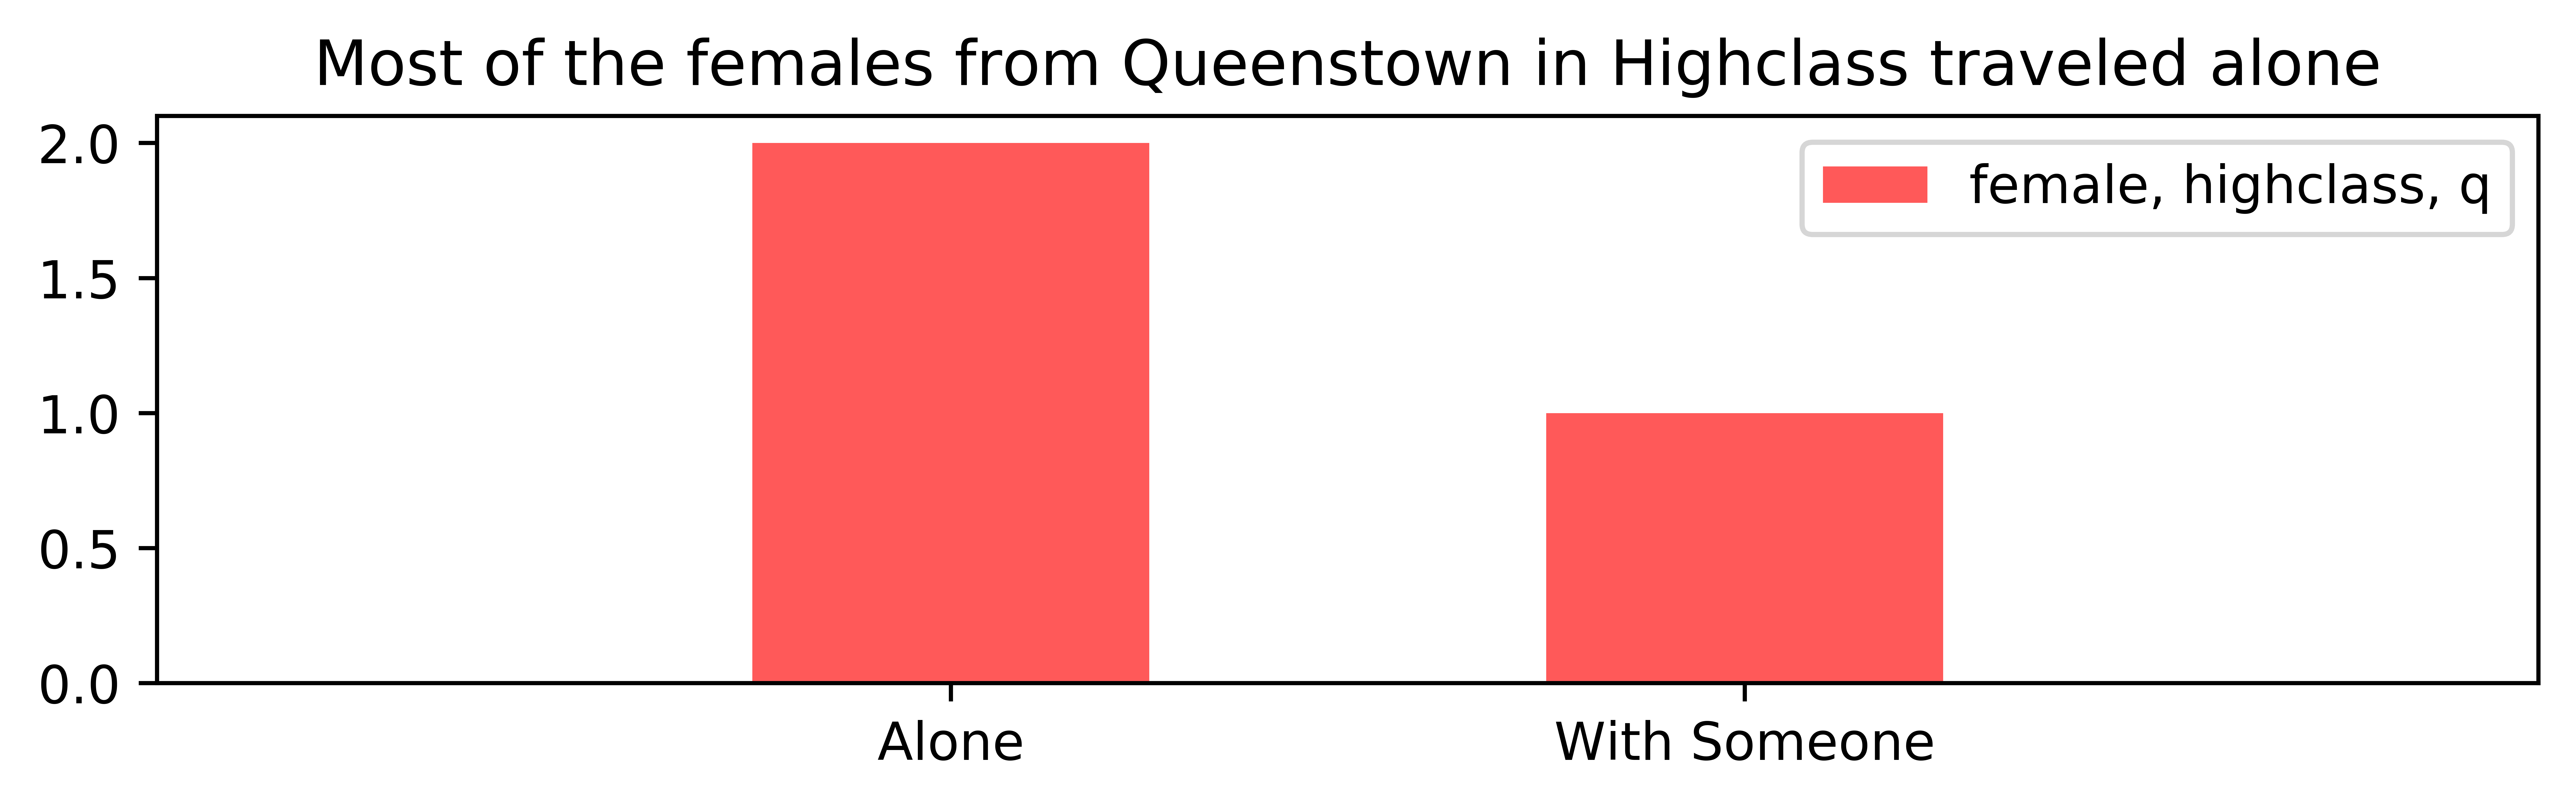

In [164]:
fig = plt.figure(figsize=(18,2), dpi=1600)
alpha_level = 0.65

ax1=fig.add_subplot(121)
female_highclass_q_travel = titanic.TravelAlone[titanic.Sex == 'female'][titanic.Pclass != 3][titanic.Embarked == 'Q'].value_counts()
female_highclass_q_travel.plot(kind='bar', label='female, highclass, q', color='red', alpha=alpha_level)
ax1.set_xticklabels(["Alone", "With Someone"], rotation=0)
ax1.set_xlim(-1, len(female_highclass_q_travel))
plt.title("Most of the females from Queenstown in Highclass traveled alone")
plt.legend(loc='best')

## 6. Key Takeaway

From the data set provided:
<br> Female passenger is most likely to survive the voyage
<br> Female passanger in high class cabin (not in cabin 3) has higher chance of surviving
<br> Female passanger in high class from Queenstown will definately survive the voyage regardless of traveling alone or not